In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append("../")
from src.graph import NetworkGraph

In [2]:
from flatland.envs.rail_env import RailEnv
from flatland.envs.observations import *
from flatland.envs.rail_generators import complex_rail_generator,rail_from_manual_specifications_generator,random_rail_generator, RailGenerator
from flatland.envs.schedule_generators import complex_schedule_generator, random_schedule_generator, ScheduleGenerator
from flatland.utils.rendertools import RenderTool
from flatland.envs.rail_env import RailEnv
from flatland.envs.observations import *
from flatland.envs.rail_generators import complex_rail_generator,rail_from_manual_specifications_generator,random_rail_generator, RailGenerator,sparse_rail_generator
from flatland.envs.schedule_generators import complex_schedule_generator, random_schedule_generator, ScheduleGenerator, sparse_schedule_generator
from flatland.utils.rendertools import RenderTool, AgentRenderVariant

In [3]:
def create_env_sparse(height,width,seed,number_of_agents=5):

    stochastic_data = {'prop_malfunction': 0,  # Percentage of defective agents
                       'malfunction_rate': 30,  # Rate of malfunction occurence
                       'min_duration': 3,  # Minimal duration of malfunction
                       'max_duration': 20  # Max duration of malfunction
                       }
    speed_ration_map = {1.: 1,  # Fast passenger train
                        1. / 2.: 0,  # Fast freight train
                        1. / 3.: 0,  # Slow commuter train
                        1. / 4.: 0}  # Slow freight train
    env = RailEnv(width=height,
                  height=width,
                  rail_generator=sparse_rail_generator(max_num_cities=number_of_agents+2,  
                                                       seed=seed, 
                                                       grid_mode=False,
                                                       max_rails_between_cities=4,
                                                       max_rails_in_city=4,
                                                       ),
                  schedule_generator=sparse_schedule_generator(speed_ration_map,seed = seed),
                  number_of_agents=number_of_agents,
                  stochastic_data=stochastic_data,  
                  obs_builder_object=GlobalObsForRailEnv(),
                  remove_agents_at_target=True
                  )
    env.reset()

    return env

In [4]:
def create_env(height,width,seed,number_of_agents=5):
    env = RailEnv(width=width,
              height=height,
              rail_generator=complex_rail_generator(nr_start_goal=20, nr_extra=1, 
                                                    min_dist=6, max_dist=99999, seed = seed),
              schedule_generator=complex_schedule_generator(),
              number_of_agents=number_of_agents)
    
    env.reset()
    
    return env

In [5]:
env = create_env(5,7,1,5)

In [6]:
env_renderer = RenderTool(env,screen_height=1200,screen_width=1200,
                          agent_render_variant=AgentRenderVariant.AGENT_SHOWS_OPTIONS_AND_BOX,
                          show_debug=True)
env_renderer.render_env(show=True, show_predictions=False, show_observations=False)

In [7]:
from src.flows import *
from src.graph import *

In [8]:
test = NetworkGraph(np.array(env.rail.grid.tolist()))

/home/charles/anaconda3/envs/flatland-rl/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/charles/anaconda3/envs/flatland-rl/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


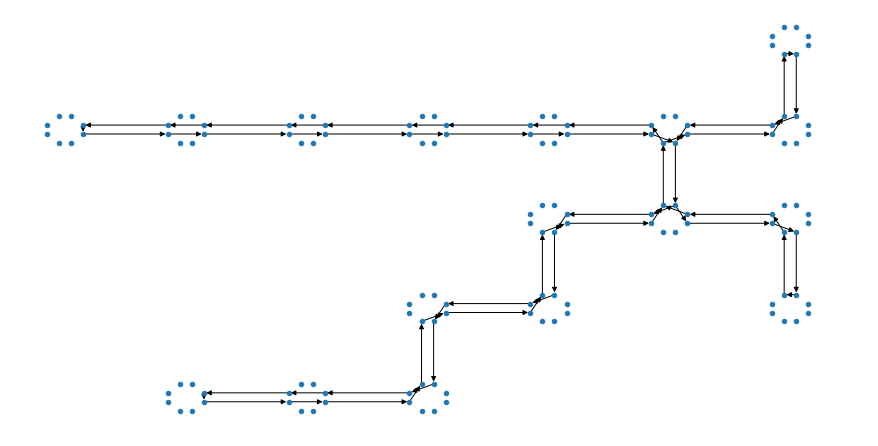

In [9]:
test.show(title= "test_flatland_network.jpg")

In [11]:
img = env_renderer.get_image()

In [12]:
from PIL import Image

In [13]:
image = Image.fromarray(img)

In [17]:
image.save("env.png")

In [ ]:

import networkx as nx

G=nx.star_graph(2)
pos=nx.spring_layout(G)
colors=range(2)
nx.draw(G,pos,node_color='#A0CBE2',edge_color=colors,width=4,edge_cmap=plt.get_cmap("CMRmap"),with_labels=False)
plt.savefig("edge_colormap.png") # save as png
plt.show() # display


In [ ]:
x = [0,1,2,3,4,5,6,7]

In [ ]:
#plt.subplot(111, facecolor=(46/255., 48/255., 55/255.))
plt.plot(x,x)
plt.savefig("test.png")

In [ ]:
x = np.array(x)

In [ ]:
plt.rcParams['savefig.facecolor'] = (46/255., 48/255., 55/255.)
plt.rcParams['axes.facecolor'] = (46/255., 48/255., 55/255.)
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.spines['bottom'].set_color("white")
ax.spines['top'].set_color("white") 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.title.set_color('white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
fig.set_facecolor((46/255., 48/255., 55/255.))
ax.set_facecolor((46/255., 48/255., 55/255.))


plt.plot(x,x, label = "wtf")
plt.xlabel("wtf")
plt.title("coucou")

#l = plt.legend()
#for text in l.get_texts():
#    text.set_color("white")



ax = plt.gca()
plt.savefig("test.png")

In [ ]:
fig=plt.figure()
plt.rcParams['axes.facecolor'] = (46/255., 48/255., 55/255.)

# Plot the data and set the labels.
plt.plot(x,x,color='r', label ="wtf")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

# Save the figure to a file
plt.savefig("face.png")

In [ ]:
plt.plot(x,x)
plt.show()

In [ ]:
import pylab as plt
plt.plot(x, label="randn")

leg = plt.legend(framealpha = 0, loc = 'best')
for text in leg.get_texts():
    plt.setp(text, color = 'w')